# Listing Collections, Bands and Assets

In [1]:
from pystac_client import Client
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from pystac_client import Client

In [2]:
local =  gpd.read_file('fiji_viti.geojson')
area_of_interest = local.geometry[0]

In [3]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

### Collections

In [4]:
collections = catalog.get_children()
for collection in collections:
    print(f"{collection.id} - {collection.title}")

aster-l1t - ASTER L1T
landsat-8-c2-l2 - Landsat 8 Collection 2 Level-2
hrea - HREA: High Resolution Electricity Access
naip - NAIP: National Agriculture Imagery Program
goes-cmi - GOES-R Cloud & Moisture Imagery
daymet-daily-na - Daymet Daily North America
daymet-annual-pr - Daymet Annual Puerto Rico
sentinel-2-l2a - Sentinel-2 Level-2A
nasadem - NASADEM HGT v001
mobi - MoBI: Map of Biodiversity Importance
gridmet - gridMET
terraclimate - TerraClimate
us-census - US Census
gbif - Global Biodiversity Information Facility (GBIF)
nrcan-landcover - Land Cover of Canada
gap - USGS Gap Land Cover
fia - Forest Inventory and Analysis
jrc-gsw - JRC Global Surface Water
io-lulc - Esri 10-Meter Land Cover (10-class)
daymet-daily-pr - Daymet Daily Puerto Rico
daymet-daily-hi - Daymet Daily Hawaii
daymet-monthly-na - Daymet Monthly North America
daymet-monthly-pr - Daymet Monthly Puerto Rico
daymet-annual-na - Daymet Annual North America
daymet-monthly-hi - Daymet Monthly Hawaii
daymet-annual-hi - 

### Bands

In [5]:
collection_name = "sentinel-2-l2a"
collection = catalog.get_child(collection_name)
for band in collection.extra_fields["summaries"]["eo:bands"]:
    name = band["name"]
    description = band["description"]
    common_name = "" if "common_name" not in band else f"({band['common_name']})"
    #ground_sample_distance = band["gsd"]
    #print(f"{name} {common_name}: {description} ({ground_sample_distance}m resolution)")
    print(f"{name} {common_name}: {description}") 

AOT : aerosol optical thickness
B01 (coastal): coastal aerosol
B02 (blue): visible blue
B03 (green): visible green
B04 (red): visible red
B05 (rededge): vegetation classification red edge
B06 (rededge): vegetation classification red edge
B07 (rededge): vegetation classification red edge
B08 (nir): near infrared
B8A (rededge): vegetation classification red edge
B09 : water vapor
B11 (swir16): short-wave infrared, snow/ice/cloud classification
B12 (swir22): short-wave infrared, snow/ice/cloud classification


In [12]:
collection = catalog.get_child("landsat-8-c2-l2")
for band in collection.extra_fields["summaries"]["eo:bands"]:
    name = band["name"]
    description = band["description"]
    common_name = "" if "common_name" not in band else f"({band['common_name']})"
    ground_sample_distance = band["gsd"]
    print(f"{name} {common_name}: {description} ({ground_sample_distance}m resolution)")
    

SR_B1 (coastal): coastal (30m resolution)
SR_B2 (blue): visible blue (30m resolution)
SR_B3 (green): visible green (30m resolution)
SR_B4 (red): visible red (30m resolution)
SR_B5 (nir): near-infrared (30m resolution)
SR_B6 (swir16): short-wave infrared (30m resolution)
SR_B7 (swir22): short-wave infrared (30m resolution)
ST_B10 (lwir11): long-wave infrared (100m resolution)
ST_TRAD : thermal radiance (30m resolution)
ST_URAD : upwelled radiance (30m resolution)
ST_ATRAN : atmospheric transmission (30m resolution)
ST_CDIST : distance to nearest cloud (30m resolution)
ST_DRAD : downwelled radiance (30m resolution)
ST_EMIS : emissivity (30m resolution)
ST_EMSD : emissivity standard deviation (30m resolution)


### Assets

In [7]:
time_range = "2020-12-01/2020-12-31"

search = catalog.search(
    collections=[collection_name], intersects=area_of_interest, datetime=time_range
)

In [8]:
items = list(search.get_items())
for item in items:
    print(f"{item.id}: {item.datetime}")

S2B_MSIL2A_20201229T221939_R029_T60KXF_20210104T112330: 2020-12-29 22:19:39.024000+00:00
S2B_MSIL2A_20201229T221939_R029_T60KXE_20201230T081018: 2020-12-29 22:19:39.024000+00:00
S2B_MSIL2A_20201229T221939_R029_T60KWE_20201230T081040: 2020-12-29 22:19:39.024000+00:00
S2A_MSIL2A_20201227T223011_R072_T60KXF_20201228T100838: 2020-12-27 22:30:11.024000+00:00
S2A_MSIL2A_20201227T223011_R072_T60KXE_20201228T100536: 2020-12-27 22:30:11.024000+00:00
S2A_MSIL2A_20201227T223011_R072_T60KWF_20201228T100611: 2020-12-27 22:30:11.024000+00:00
S2A_MSIL2A_20201227T223011_R072_T60KWE_20201228T100535: 2020-12-27 22:30:11.024000+00:00
S2A_MSIL2A_20201224T221941_R029_T60KXF_20201225T135847: 2020-12-24 22:19:41.024000+00:00
S2A_MSIL2A_20201224T221941_R029_T60KXE_20201225T135641: 2020-12-24 22:19:41.024000+00:00
S2A_MSIL2A_20201224T221941_R029_T60KWE_20201225T135922: 2020-12-24 22:19:41.024000+00:00
S2B_MSIL2A_20201222T223009_R072_T60KXF_20201225T102426: 2020-12-22 22:30:09.024000+00:00
S2B_MSIL2A_20201222T2

In [9]:
selected_item = sorted(items, key=lambda item: item.properties["eo:cloud_cover"])[0]

In [10]:
for asset_key, asset in selected_item.assets.items():
    print(f"{asset_key:<25} - {asset.title}")

AOT                       - Aerosol optical thickness (AOT)
B01                       - Band 1 - Coastal aerosol - 60m
B02                       - Band 2 - Blue - 10m
B03                       - Band 3 - Green - 10m
B04                       - Band 4 - Red - 10m
B05                       - Band 5 - Vegetation red edge 1 - 20m
B06                       - Band 6 - Vegetation red edge 2 - 20m
B07                       - Band 7 - Vegetation red edge 3 - 20m
B08                       - Band 8 - NIR - 10m
B09                       - Band 9 - Water vapor - 60m
B11                       - Band 11 - SWIR (1.6) - 20m
B12                       - Band 12 - SWIR (2.2) - 20m
B8A                       - Band 8A - Vegetation red edge 4 - 20m
SCL                       - Scene classfication map (SCL)
WVP                       - Water vapour (WVP)
visual                    - True color image
preview                   - Thumbnail
safe-manifest             - SAFE manifest
granule-metadata          - Granul

### Get Asset

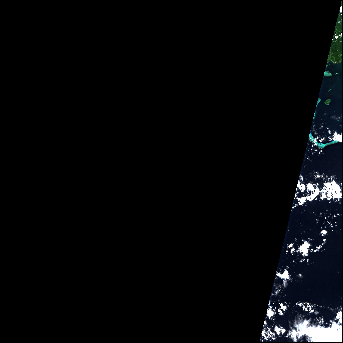

In [11]:
import requests
import planetary_computer as pc
from PIL import Image
from urllib.request import urlopen

asset = selected_item.assets["preview"]
requests.get(asset.href)
signed_href = pc.sign(asset.href)
Image.open(urlopen(signed_href))